In [1]:
### Investigation on credit risk migration in terms of Risk Weight

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Dataset.csv")

In [4]:
df

,PERIOD,CUSTOMER_ID,BRANCH,APPROACH,RATING,PD,LGD,ORIGINAL_EXPOSURE,EAD_AMOUNT,RWA,EXPECTED_LOSS
0,Period1,H136768,Sydney,AIRB,PC2,0.07060,0.316,50000.0,4250.0,4832.7,94.8
1,Period2,H136768,Sydney,AIRB,PC2,0.07060,0.316,50000.0,25000.0,28235.2,557.7
2,Period1,G136767,Sydney,AIRB,PC0+,1.00000,0.316,1000.0,0.0,0.0,0.0
3,Period2,G136767,Sydney,AIRB,PC0+,1.00000,0.316,900.0,0.0,0.0,0.0
4,Period2,C136711,Sydney,AIRB,PC0+,1.00000,0.316,241.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1604416,Period2,V341740,Kuala Lumpur,FIRB,PC4,0.00353,0.450,783.8,783.8,490.3,1.2
1604417,Period2,C341721,Kuala Lumpur,FIRB,PC4,0.00353,0.450,921.6,921.6,493.4,1.5
1604418,Period2,C341721,Kuala Lumpur,FIRB,PC4,0.00353,0.400,1400.7,1400.7,666.6,2.0
1604419,Period2,W341741,Kuala Lumpur,FIRB,PC3,0.01247,0.450,334.6,334.6,284.5,1.9


In [5]:
df=df[df["EAD_AMOUNT"]!=0]

In [6]:
df["Risk_Weight"]= df["RWA"]/df["EAD_AMOUNT"]

In [7]:
result=df.pivot_table(index=['CUSTOMER_ID'], columns='PERIOD', values=["Risk_Weight","EXPECTED_LOSS"],aggfunc=( 'mean',"sum"))

In [8]:
result["diff_Risk_Weight"]=result[(  'Risk_Weight', 'mean', 'Period2')]-result[(  'Risk_Weight', 'mean', 'Period1')]

In [9]:
result["diff_EXPECTED_LOSS"]=result[('EXPECTED_LOSS',  'sum', 'Period2')]-result[('EXPECTED_LOSS',  'sum', 'Period1')]

In [10]:
cols = ["diff_Risk_Weight","diff_EXPECTED_LOSS"]
cols_normalised = [col+"_normalised" for col in cols]
t = result[cols].copy().reset_index()
t[cols_normalised] = (t[cols])/(abs(t[cols]).max())

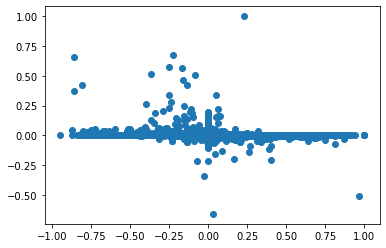

In [11]:
plt.scatter(t["diff_Risk_Weight_normalised"],t["diff_EXPECTED_LOSS_normalised"])
plt.show()

In [12]:
### The total amount of Risk Weight in period 1

In [13]:
c=result[(  'Risk_Weight', 'mean', 'Period1')]
a=c.mean()
a

0.46351510192647877

In [14]:
### The total amount of Risk Weight in period 2

In [15]:
c1=result[(  'Risk_Weight', 'mean', 'Period2')]
a2=c1.mean()
a2

0.45904987847511847

In [16]:
### The total amount of Risk Weight for exist customers

In [17]:
Exist_customer=result[(result[(  'Risk_Weight', 'mean', 'Period1')].notna()) & (result[(  'Risk_Weight', 'mean', 'Period2')].notna())]                                                                                                

In [18]:
c3=Exist_customer[(  'Risk_Weight', 'mean', 'Period2')]
a3=c3.mean()
a3

0.4577234662069126

In [19]:
### The total amount of Risk Weight for new customers

In [20]:
New_customer=result[(result[(  'Risk_Weight', 'mean', 'Period1')].isna()) & (result[(  'Risk_Weight', 'mean', 'Period2')].notna())]                                                                                                

In [21]:
c4=New_customer[(  'Risk_Weight', 'mean', 'Period2')]
a4=c4.mean()
a4

0.46483107783885314

In [22]:
### Risk Weight_unrated(PD=pcu)

In [23]:
df1=df[df["RATING"]=="PCU"]

In [24]:
df1["Risk_Weight"]= df1["RWA"]/df1["EAD_AMOUNT"]

In [25]:
result=df1.pivot_table(index=['CUSTOMER_ID'], columns='PERIOD', values='Risk_Weight',aggfunc="mean")

In [26]:
### The total amount of Risk Weight in period 1

In [27]:
c=result["Period1"]
a=c.mean()
a

0.7413519123643949

In [28]:
### The total amount of Risk Weight in period 2

In [29]:
c1=result["Period2"]
a2=c1.mean()
a2

0.7011640626138127

In [30]:
### The total amount of Risk Weight for unrated exist customers

In [31]:
Exist_customer=result[(result['Period1'].notna()) & (result['Period2'].notna())]                                                                                                

In [32]:
c3=Exist_customer["Period2"]
a3=c3.mean()
a3

0.7021938676783174

In [33]:
### The total amount of Risk Weight for unrated new customers

In [34]:
New_customer=result[(result['Period1'].isna()) & (result['Period2'].notna())]                                                                                                

In [35]:
c4=New_customer["Period2"]
a4=c4.mean()
a4

0.6984585231461946

In [ ]:
labels = ['Period 1', 'Period 2', 'New Customers', 'Existing Customers']
RW_Normal = [0.46, 0.45, 0.46, 0.45]

RW_Unrated =[0.74, 0.70, 0.69, 0.70]



x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, RW_Normal, width, label='Normal')

rects4 = ax.bar(x + 2*width, RW_Unrated, width, label='Unrated')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('EL', fontsize=12)
ax.set_title('Risk Migration in terms of Expected Loss (EL)')
ax.set_xticks(x, labels, fontsize=12)
ax.legend(loc='upper right', fontsize=10)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)
plt.ylim([0,2300])

fig.tight_layout()

plt.show()